In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az
from scipy import stats

### Compare models with differnt learning rate and weighting parameter

In [15]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# name of table
tabel = 'Tabel1'
list_model = ['tabel1_model1_complement_prob', 'tabel1_model2_complement_prob', 'tabel1_model3_complement_prob',
              'tabel1_model4_complement_prob']
# declare waice variable
waic = np.zeros(len(list_model))
log_lppd_models = np.zeros(len(list_model))
# loop over list of participants
model_name = list_model[0]
# main directory of saving
writeMainScarch = '/mnt/scratch/projects/7TPD/amin'
# The adrees name of pickle file
pickelDir = f'{writeMainScarch}/Behavioral/Tabel1/{partcipant_group}/{model_name}_{partcipant_group}_Act.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit['log_lik']
print(log_lik.shape)
model_Comparision_criteria = utils.waic(log_likelihood=log_lik)
waic = model_Comparision_criteria['waic']


(3357, 24000)


In [ ]:
waic model 4 Action

30601.42124523315

In [ ]:
waic Model 4 Stim

32761.038327986174

In [ ]:
waic Model 1 Stim

32636.629037639716

In [ ]:
waic Model 1 Act

31981.899717935412

In [23]:
(30601.42124523315+32761.038327986174)/2

31681.229786609663

In [ ]:
()

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [7]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'PD'
# name of table
tabel = 'Tabel3'
list_model = ['tabel3_model10_complement_prob']
# declare waice variable
waic = np.zeros(len(list_model))
log_lppd_models = np.zeros(len(list_model))
# loop over list of participants
model_name = list_model[0]
# main directory of saving
writeMainScarch = '/mnt/scratch/projects/7TPD/amin'
# The adrees name of pickle file
pickelDir = f'{writeMainScarch}/Behavioral/{tabel}/{partcipant_group}/{model_name}_{partcipant_group}.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit['log_lik']
print(log_lik.shape)
model_Comparision_criteria = utils.waic(log_likelihood=log_lik)
waic = model_Comparision_criteria['waic']


(7251, 24000)


In [6]:
pickelDir

'/mnt/scratch/projects/7TPD/amin/Behavioral/Tabel3/PD/tabel3_model10_complement_prob_PD_Act.pkl'

TypeError: object of type 'numpy.float64' has no len()

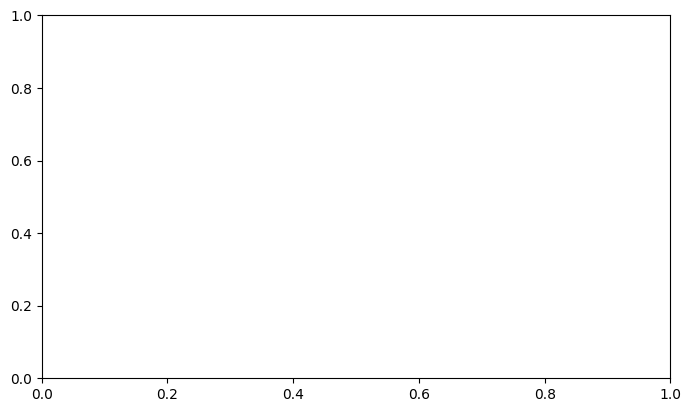

In [8]:

# Extracting posterior distributions for each of four main unkhown parameters
hier_weight_mu = fit["transfer_hier_weight_mu"] 
hier_alphaAct_pos_mu = fit["transfer_hier_alphaAct_pos_mu"]  
hier_alphaAct_neg_mu = fit["transfer_hier_alphaAct_neg_mu"] 
hier_alphaClr_pos_mu = fit["transfer_hier_alphaClr_pos_mu"]
hier_alphaClr_neg_mu = fit["transfer_hier_alphaClr_neg_mu"] 
hier_sensitivity_mu = fit["transfer_hier_sensitivity_mu"].flatten() 

# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 8), tight_layout=True)
rows = 2
columns = 3

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(hier_weight_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(hier_weight_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(hier_weight_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(hier_weight_mu[1,1], kde=True, stat='density', bins=100)
plt.title('Hierarchical Weighting',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ w $',  fontsize=18)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 1)
plt.legend(['Act', 'Clr']) 